In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
from os import listdir
all_files = listdir('./bin')
codes = []

for f in all_files:
    if f.endswith('_seq'):
        codes.append(f[:-4])
codes = sorted(codes)

In [3]:
def get_time_for_chart(df):
    df_mean = df.mean()
    df_std = df.std()
    ends = ['_seq', '_icc', '_neuromp']
    mean = []
    std = []
    for c in codes:
        for e in ends:
            mean.append(df_mean[c+e])
            std.append(df_std[c+e])
    mean = np.array(mean)
    std = np.array(std)
    mean = mean.reshape(-1, 3)
    std = std.reshape(-1, 3)
    
    struct_mean_df = pd.DataFrame(mean, columns=['sequential', 'icc', 'neuromp'])
    struct_mean_df['algorithm'] = codes
    
    struct_std_df = pd.DataFrame(std, columns=['sequential', 'icc', 'neuromp'])
    struct_std_df['algorithm'] = codes
    
    struct_mean_df = struct_mean_df.set_index('algorithm')
    struct_std_df = struct_std_df.set_index('algorithm')
    
    return struct_mean_df, struct_std_df

In [4]:
def plot_times(struct_mean_df, struct_std_df):
    fig, ax = plt.subplots()
    p = struct_mean_df.plot(figsize=(15,5),\
                            legend=True,\
                            kind="bar",\
                            fontsize=16,\
                            yerr=struct_std_df,\
                            ax=ax)
    p.set_title("Mean Execution Time Microbrenchmark", fontsize=18)
    p.set_xlabel("Algorithm", fontsize=18)
    p.set_ylabel("Time (seconds)", fontsize=18)
    ax.set_axisbelow(True)
    ax.grid()

In [5]:
def get_speedup_for_chart(df):
    ends = ['_icc', '_neuromp']
    speed_ups = pd.DataFrame()
    for c in codes:
        for e in ends:
            speed_ups[c+e+'_speedup'] = df[c+'_seq']/df[c+e]
            
    mean_speedup = speed_ups.mean().values.reshape((-1, 2))
    std_speedup = speed_ups.std().values.reshape((-1, 2))
    
    mean_speedup_df = pd.DataFrame(mean_speedup, columns=['icc', 'neuromp'])
    std_speedup_df = pd.DataFrame(std_speedup, columns=['icc', 'neuromp'])
    
    mean_speedup_df['algorithm'] = codes
    std_speedup_df['algorithm'] = codes
    
    mean_speedup_df = mean_speedup_df.set_index('algorithm')
    std_speedup_df = std_speedup_df.set_index('algorithm')
    
    return mean_speedup_df, std_speedup_df

In [6]:
def plot_speedup(mean_speedup_df, std_speedup_df):
    fig, ax = plt.subplots()
    p = mean_speedup_df.plot(figsize=(15,5),\
                             legend=True,\
                             kind="bar",\
                             fontsize=16,\
                             yerr=std_speedup_df, \
                             ax=ax, \
                             ylim=[0, 3])

    p.set_title("Mean SpeedUp Microbrenchmark", fontsize=18)
    p.set_xlabel("Algorithm", fontsize=18)
    p.set_ylabel("SpeedUp", fontsize=18)
    ax.set_axisbelow(True)
    ax.grid()

In [13]:
def plot_charts(time_file):
    times = pickle.load( open( time_file, "rb" ) )
    df = pd.DataFrame(times)
    #mean, std = get_time_for_chart(df)
    #plot_times(mean, std)
    mean_speedup, std_speedup = get_speedup_for_chart(df)
    plot_speedup(mean_speedup, std_speedup)

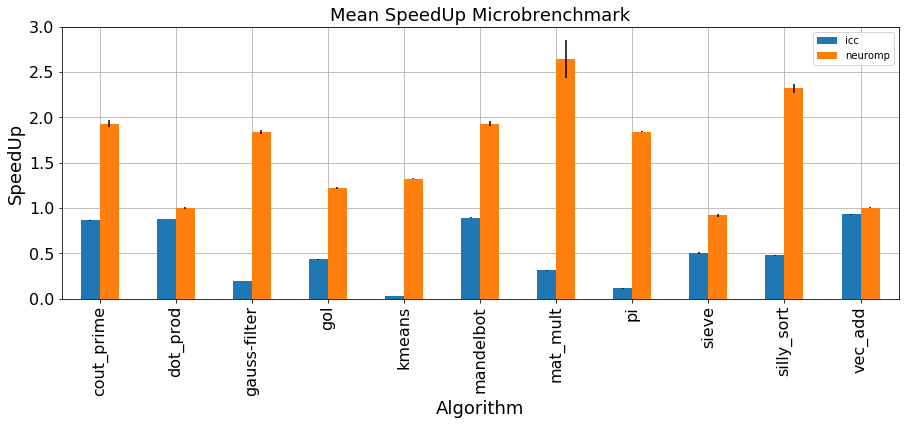

In [14]:
plot_charts("times_o0.pickle")

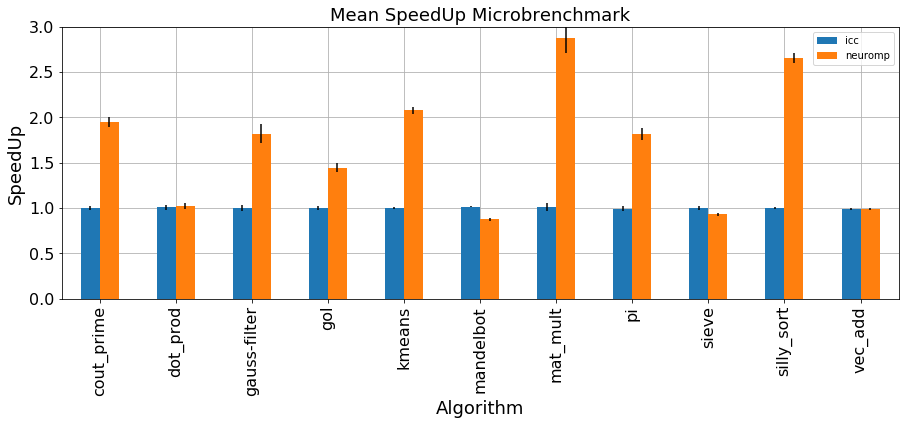

In [15]:
plot_charts("times_o1.pickle")

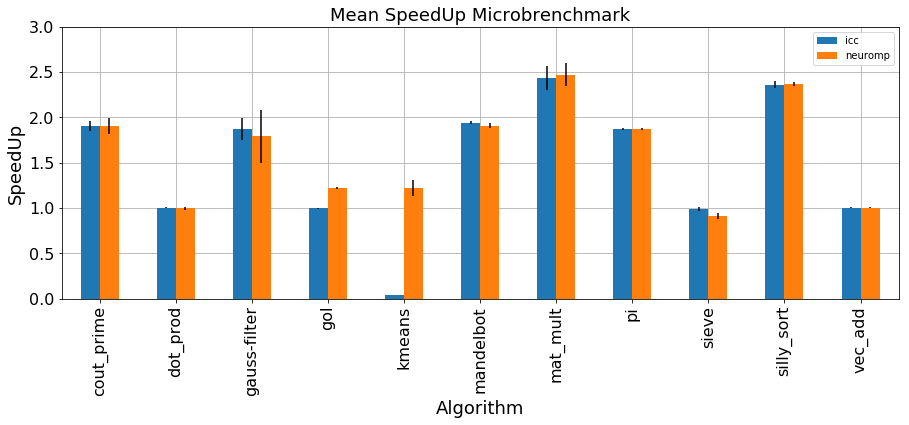

In [16]:
plot_charts("times_o2.pickle")

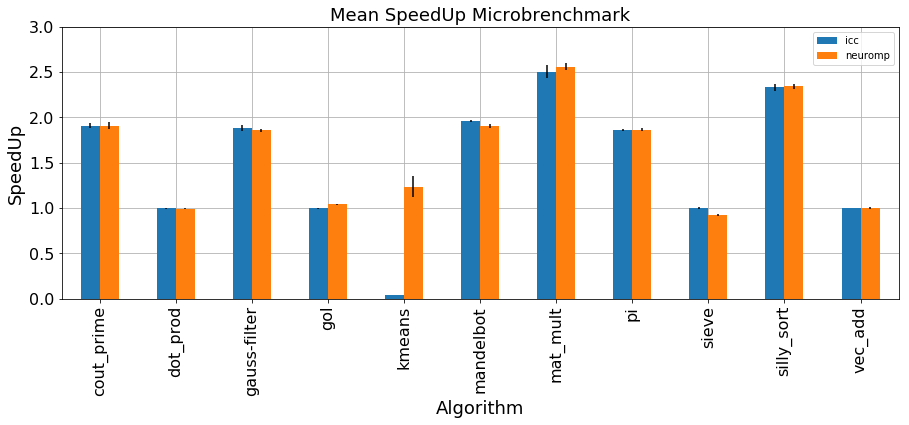

In [17]:
plot_charts("times_o3.pickle")